In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
from scipy import stats
import matplotlib.ticker       as ticker

In [2]:
pd.set_option("display.max_colwidth", None)

We’re really interested in understanding:
-	How did our internship compare to other internships this summer?
-	How did the experiences of our fully remote interns differ from interns that had a hybrid internship model?
-	How do ratings of our internship experience differ by race & gender?

In [3]:
df = pd.read_csv("../data/internship.csv")
df = df.drop(['Unnamed: 4','Unnamed: 7', 'Unnamed: 19',], axis=1)

In [4]:
df = df.drop(0)

In [5]:
df.head(1)

,Member,Format,Race/ethnicity,Gender,Net Promoter Score (NPS),NPS_GROUP,Objectives - Compensation,Objectives - Building my resume,Objectives - Learning about a career,Objectives - Learning about the employer,...,Drivers to apply - Building my resume,Drivers to apply - Learning about a career,Drivers to apply - Learning about the employer,Drivers to apply - Building new skillsets,Drivers to apply - Building a network,Drivers to apply - Doing interesting work,Drivers to apply - Improving my social life,Drivers to apply - Building peer relationships,Drivers to apply - Building mentor relationships,Drivers to apply - Securing full-time employment
1,Company A,Exclusively remote/virtual,White or Caucasian,Women,8,Passive,Moderately well,Extremely well,Extremely well,Extremely well,...,Moderately important,Extremely important,Moderately important,Very important,Moderately important,Moderately important,Not at all important,Moderately important,Moderately important,Moderately important


__Get a set of race/ethnicity options:__

In [6]:
race_set=set()
for elem in list(df['Race/ethnicity'].unique()):
    for i in elem.split(','):
        if i != 'Prefer not to say':
            race_set.add(i)

### How did our internship compare to other internships this summer?

__Let's look at it in terms of NPS first, and compare Company A to all companies:__

In [7]:
company_a_nps = df[df['Member']=='Company A']['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
# not_company_a_nps = df[df['Member']!='Company A']['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
nps = df['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
pd.DataFrame([company_a_nps, nps], index=['Company A', 'All'], columns=['NPS']).T

,Company A,All
NPS,8.668874,8.832251


We see that the average NPS score of company A is smaller than that of all companies.

__Only looking at NPS scores may not provide a holistic picture in our analysis. Let's explore another series of metrics in the dataset - Objectives.__

**Map categorical survey data (Objectives) to numeric values within the same scale:**

In [8]:
cat_map = {'Not at all':1, 'Slightly well':2, 'Moderately well':3, 'Very well':4, 'Extremely well':5 }
df2 = df.copy()
df2 = df2.replace(cat_map)
df2.insert(17, 'Objective Score (RSS)',np.sqrt(np.sum(np.power(df2.iloc[:,6:17], 2), axis=1)))
df2.insert(18, 'Objective Score (mean)', np.mean(df2.iloc[:,6:17], axis=1))
df2['Net Promoter Score (NPS)'] = df2['Net Promoter Score (NPS)'].astype(int)

__Now we compute average obecjective scores for Company A and all companies combined:__

In [9]:
df_objectives = pd.DataFrame()
df_objectives_diff = pd.DataFrame()
my_dict1={}
my_dict2={}

for i in range(6, 19):
    mean = (df2.iloc[:, i]).mean()
    mean_A = (df2[(df2['Member'] == 'Company A')].iloc[:, i]).mean()
    my_dict1[df2.columns[i]] = mean_A
    my_dict2[df2.columns[i]] = mean_A-mean

my_dict1
  
df_objectives = pd.Series(my_dict1).to_frame(name='mean').T
df_objectives_diff = pd.Series(my_dict2).to_frame(name='mean diff').T
df_objectives = df_objectives.drop(columns=['Objective Score (RSS)'])
df_objectives_diff = df_objectives_diff.drop(columns=['Objective Score (RSS)'])
# df_objectives_diff

/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/2514293055.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


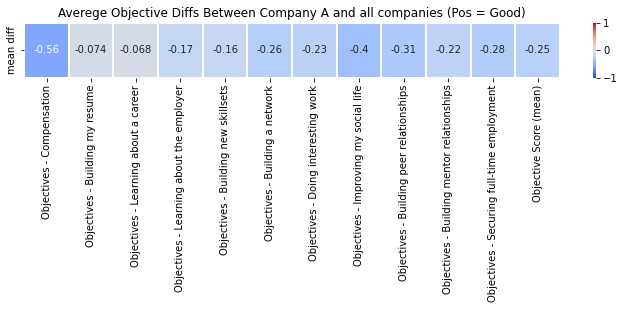

In [10]:
fig, ax = plt.subplots(figsize=(12, 1))
sns.heatmap(df_objectives_diff, linewidths=0.05, center=0, vmin=-1, vmax=1, cmap="coolwarm", annot=True)
ax.set_title('Averege Objective Diffs Between Company A and all companies (Pos = Good)')
fig.show()
# fig.savefig('corr_heatmap_veris.png', bbox_inches = "tight", facecolor='white', dpi=600)

/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/2495369891.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


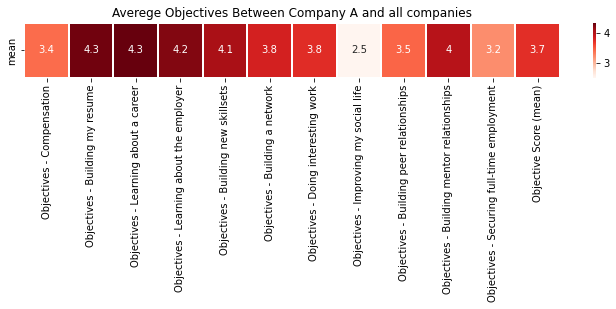

In [11]:
fig, ax = plt.subplots(figsize=(12, 1))
sns.heatmap(df_objectives, linewidths=0.05, cmap="Reds", annot=True)
ax.set_title('Averege Objectives Between Company A and all companies')
fig.show()
# fig.savefig('corr_heatmap_veris.png', bbox_inches = "tight", facecolor='white', dpi=600)

We see that, same as NPS, all objectives are blue, meaning company A is rated less than all companies combined, with a significant emphasis on the compensation objectives.

----

### How did the experiences of our fully remote interns differ from interns that had a hybrid internship model?

__Let's see if NPS differs for different types of work format for company A compared to all companies:__

In [12]:

company_a_nps_remote = df[(df['Member']=='Company A') & (df['Format']=='Exclusively remote/virtual')]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
company_a_nps_hybrid = df[(df['Member']=='Company A') & (df['Format']=='Hybrid - partially remote, partially in-person')]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
company_a_nps_inperson = df[(df['Member']=='Company A') & (df['Format']=='Exclusively in-person')]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
temp1 = pd.DataFrame([company_a_nps_remote, company_a_nps_hybrid, company_a_nps_inperson], index=['Exclusively remote/virtual','Hybrid - partially remote, partially in-person','Exclusively in-person'], columns=['Company A NPS'])

#for not company A
nps_remote = df[(df['Format']=='Exclusively remote/virtual')]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
nps_hybrid = df[(df['Format']=='Hybrid - partially remote, partially in-person')]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
nps_inperson = df[(df['Format']=='Exclusively in-person')]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
temp2 = pd.DataFrame([nps_remote, nps_hybrid, nps_inperson], index=['Exclusively remote/virtual','Hybrid - partially remote, partially in-person','Exclusively in-person'], columns=['NPS'])

df_ennv_nps = temp1.join(temp2)
df_ennv_nps 

,Company A NPS,NPS
Exclusively remote/virtual,8.493506,8.790614
"Hybrid - partially remote, partially in-person",8.852459,9.004902
Exclusively in-person,8.846154,8.759036


We see that in the case of Company A, interns who had hybrid work environments rated much higher than those exclusively remote. When compared to all companies, Company A is consistently rated lower in NPS for both exclusively remote and hybrid experiences.

We define a function for future scalibility. 

In [13]:
def avg_objectives(feature, company, diff=False):
    df_objectives = pd.DataFrame()
    df_objectives_diff = pd.DataFrame()
    my_dict={}
    my_dict2={}
    for i in range(6, 19):
        dict1={}
        dict2={}
        if feature != 'Race/ethnicity':
            for f in df[feature].unique():
                if f != 'Prefer not to say':
                    mean = (df2[df2[feature].str.contains(f)].iloc[:, i]).mean()
                    mean_A = (df2[(df2[feature].str.contains(f)) & (df2['Member'] == company)].iloc[:, i]).mean()
                    dict1[f +', ' + company] = mean_A
                    dict2[f] = mean_A-mean
        else: 
            for f in race_set: 
                mean = (df2[df2[feature].str.contains(f)].iloc[:, i]).mean()
                mean_A = (df2[(df2[feature].str.contains(f)) & (df2['Member'] == company)].iloc[:, i]).mean()
                dict1[f +', ' + company] = mean_A
                dict2[f] = mean_A-mean
                
        ser = pd.Series(dict1)
        ser2= pd.Series(dict2)
        my_dict[df2.columns[i]]=ser
        my_dict2[df2.columns[i]]=ser2
    df_objectives = pd.concat(my_dict, axis=1)
    df_objectives_diff = pd.concat(my_dict2, axis=1)
    df_objectives = df_objectives.drop(columns=['Objective Score (RSS)'])
    df_objectives_diff = df_objectives_diff.drop(columns=['Objective Score (RSS)'])
    
    if diff: 
        return df_objectives_diff
    else:
        return df_objectives

__Let's examine the objective scores for the different formats:__

In [14]:
df_format_objectives_diff = avg_objectives('Format', 'Company A', True)
df_format_objectives_diff

,Objectives - Compensation,Objectives - Building my resume,Objectives - Learning about a career,Objectives - Learning about the employer,Objectives - Building new skillsets,Objectives - Building a network,Objectives - Doing interesting work,Objectives - Improving my social life,Objectives - Building peer relationships,Objectives - Building mentor relationships,Objectives - Securing full-time employment,Objective Score (mean)
Exclusively remote/virtual,-0.658681,-0.079962,-0.130855,-0.189671,-0.135074,-0.352103,-0.183225,-0.482536,-0.264921,-0.190632,-0.357846,-0.275046
"Hybrid - partially remote, partially in-person",-0.345789,-0.047734,0.016313,-0.182096,-0.139987,-0.205882,-0.273626,-0.370299,-0.356236,-0.191016,-0.106557,-0.200264
Exclusively in-person,-1.007414,-0.245134,-0.186284,-0.113994,-0.513902,-0.151993,-0.402688,-0.168675,-0.431418,-0.524560,-0.431881,-0.379813


/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/4058272440.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


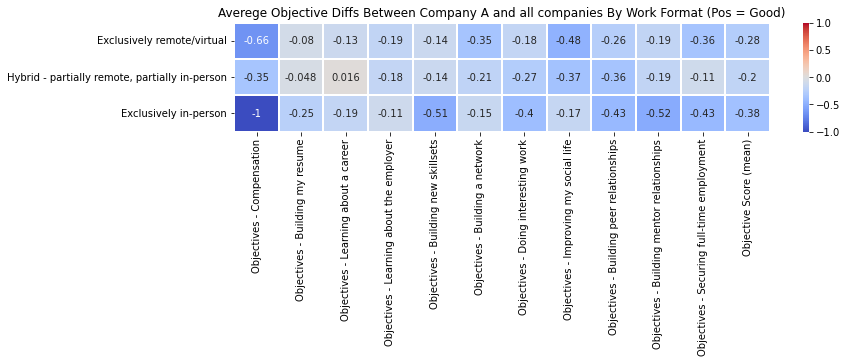

In [15]:
fig, ax = plt.subplots(figsize=(12, 2))
sns.heatmap(df_format_objectives_diff, linewidths=0.05, center=0, vmin=-1, vmax=1, cmap="coolwarm", annot=True)
# sns.heatmap(df2.iloc[:,6:17].corr(), linewidths=0.05, center=0.5, vmin=0.0, vmax=1.0)
ax.set_title('Averege Objective Diffs Between Company A and all companies By Work Format (Pos = Good)')
fig.show()
# fig.savefig('work_format_diff_heatmap_veris.png', bbox_inches = "tight", facecolor='white', dpi=200)

We see blue, which shows that the overall internship experience for each of the objectives, accross all formats, are rated less than all companies conbined. 

In [16]:
df_format_objectives = avg_objectives('Format', 'Company A')
df_format_objectives

,Objectives - Compensation,Objectives - Building my resume,Objectives - Learning about a career,Objectives - Learning about the employer,Objectives - Building new skillsets,Objectives - Building a network,Objectives - Doing interesting work,Objectives - Improving my social life,Objectives - Building peer relationships,Objectives - Building mentor relationships,Objectives - Securing full-time employment,Objective Score (mean)
"Exclusively remote/virtual, Company A",3.272727,4.246753,4.233766,4.194805,4.077922,3.662338,3.766234,2.311688,3.415584,4.025974,3.116883,3.665880
"Hybrid - partially remote, partially in-person, Company A",3.688525,4.393443,4.491803,4.278689,4.163934,4.000000,3.770492,2.688525,3.491803,4.049180,3.393443,3.855440
"Exclusively in-person, Company A",3.076923,4.230769,4.307692,4.307692,3.769231,4.076923,3.615385,3.000000,3.538462,3.692308,3.230769,3.713287


/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/411374012.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


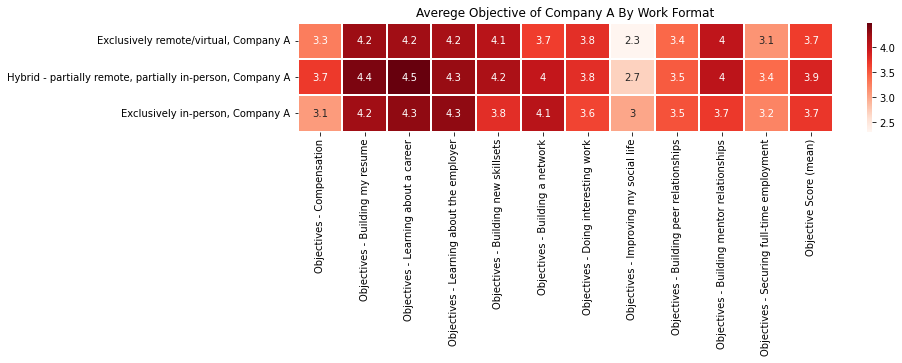

In [17]:
fig, ax = plt.subplots(figsize=(12, 2))
sns.heatmap(df_format_objectives, linewidths=0.05, cmap='Reds', annot=True)
ax.set_title('Averege Objective of Company A By Work Format')
fig.show()

Same as NPS, as the heatmap shows, Hybrid is rated higher than remote across all objectives. It is likely that the hybrid experience was more enjoyed amongst interns.

----

### How do ratings of our internship experience differ by race /ethnicity?

__Again, let's examine the experiences based on NPS first.__

In [18]:
race_nps = {}
race_nps_A = {}
race_nps_not_A = {}
for race in race_set:
    nps = df[(df['Race/ethnicity'].str.contains(race))]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
    race_nps[race] = nps
    nps_A = df[(df['Member']=='Company A') & (df['Race/ethnicity'].str.contains(race))]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
    race_nps_A[race] = nps_A
    nps_not_A = df[(df['Member']!='Company A') & (df['Race/ethnicity'].str.contains(race))]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
    race_nps_not_A[race] = nps_not_A
    
temp1 = pd.DataFrame(race_nps_A, index=['Company A NPS']).T
temp2 = pd.DataFrame(race_nps_not_A, index=['Not Company A NPS']).T
temp3 = pd.DataFrame(race_nps, index=['NPS']).T
df_race_nps = temp1.join(temp2).join(temp3)
df_race_nps['NPS diff'] = df_race_nps['Company A NPS'] - df_race_nps['NPS'] 
df_race_nps.sort_values(by='Company A NPS', ascending=False)
df_race_nps.sort_values(by='Company A NPS', ascending=False).iloc[:,0:1]

,Company A NPS
Native Hawaiian or Pacific Islander,10.000000
American Indian or Alaska Native,10.000000
Middle Eastern or North African,10.000000
White or Caucasian,8.870370
Hispanic or Latinx,8.857143
Southeast Asian,8.600000
East Asian,8.562500
South Asian,8.500000
Black or African American,7.500000


/Users/derryzrli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


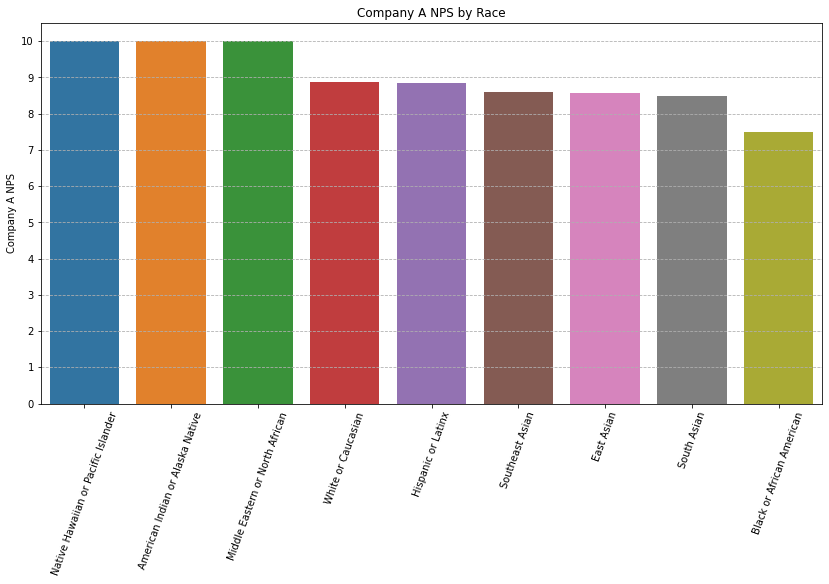

In [19]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(df_race_nps.index, 'Company A NPS' , data = df_race_nps, order=df_race_nps.sort_values('Company A NPS', ascending=False).index)
plt.xticks(rotation=70)
plt.title('Company A NPS by Race')
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid(axis='y',linestyle='--')
plt.show()

We see that Black or **African American** interns have the lowest NPS scores when comapred to their peers of other race/ethnicity, with **White or Caucasian** interns having higher NPS scores than most (Note: we should be cautious when understanding the first three NPS scores for Native Hawaiian or Pacific Islander, American Indian or Alaska Native, Middle Eastern or North African, due to their extemely small sample size.)

__We then compute a heatmap to see the diff of NPS accross all races/ethnicities between company A and all companies:__

/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/296000226.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


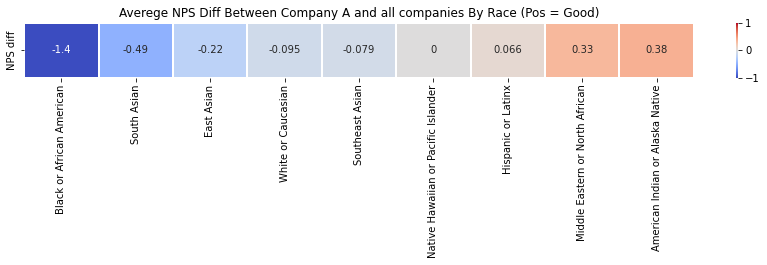

In [20]:
fig, ax = plt.subplots(figsize=(15, 1))
sns.heatmap(df_race_nps.loc[:,['NPS diff']].sort_values(by='NPS diff').T, linewidths=0.05, center=0, vmin=-1, vmax=1, cmap="coolwarm", annot=True)
ax.set_title('Averege NPS Diff Between Company A and all companies By Race (Pos = Good)')
fig.show()

We see that __Black or Afircan American__ interns have an average NPS score that is significantly less than their peers of other races, followed by South Asians, then East Asians. In addition, there is a slight negative trend across most races for NPS comparing Company A to all companies. This could mean that compared to other companies, company A is performing less well in terms of internship experiences.

----

**Now let's look at the average objective scores for each objectives accross all races and ethnicities:**

In [21]:
df_race_objectives_diff  = avg_objectives('Race/ethnicity', 'Company A', True)
df_race_objectives_diff 

,Objectives - Compensation,Objectives - Building my resume,Objectives - Learning about a career,Objectives - Learning about the employer,Objectives - Building new skillsets,Objectives - Building a network,Objectives - Doing interesting work,Objectives - Improving my social life,Objectives - Building peer relationships,Objectives - Building mentor relationships,Objectives - Securing full-time employment,Objective Score (mean)
White or Caucasian,-0.517985,-0.077468,-0.066608,-0.171272,-0.197644,-0.191003,-0.227458,-0.254072,-0.246267,-0.174278,-0.246704,-0.215523
Native Hawaiian or Pacific Islander,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
South Asian,-0.583333,0.122222,-0.016667,0.088889,0.216667,-0.088889,-0.122222,-0.627778,-0.166667,-0.077778,0.055556,-0.109091
Southeast Asian,-0.185714,-0.157143,0.150000,0.128571,0.092857,-0.092857,0.071429,0.271429,0.064286,-0.050000,0.114286,0.037013
American Indian or Alaska Native,0.500000,0.250000,0.375000,0.375000,0.125000,0.750000,0.750000,1.625000,1.000000,1.125000,2.000000,0.806818
Hispanic or Latinx,0.054945,-0.241758,-0.175824,-0.439560,-0.307692,-0.296703,-0.439560,-0.439560,-0.505495,-0.032967,-0.021978,-0.258741
Black or African American,-0.364754,-0.127049,-0.643443,-0.577869,-0.729508,-0.913934,-0.598361,-1.000000,-1.102459,-0.815574,-0.971311,-0.713115
Middle Eastern or North African,-0.333333,-0.444444,0.333333,-1.333333,0.333333,-2.000000,0.666667,-1.555556,-1.777778,-1.333333,-2.666667,-0.919192
East Asian,-0.652174,-0.081522,-0.027174,-0.225543,-0.298913,-0.309783,-0.201087,-0.584239,-0.437500,-0.317935,-0.258152,-0.308547


__We compute the heatmap to see the general trend of company A compared to all companies:__

/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/3104358261.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


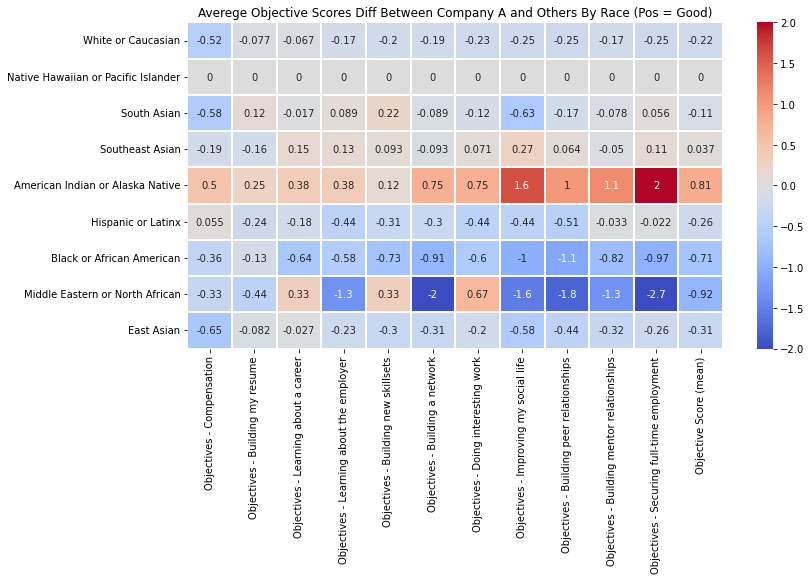

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_race_objectives_diff, linewidths=0.05, center=0, vmin=-2, vmax=2 ,cmap="coolwarm", annot=True)
# sns.heatmap(df2.iloc[:,6:17].corr(), linewidths=0.05, center=0.5, vmin=0.0, vmax=1.0)
ax.set_title('Averege Objective Scores Diff Between Company A and Others By Race (Pos = Good)')
fig.show()
# fig.savefig('corr_heatmap_veris.png', bbox_inches = "tight", facecolor='white', dpi=600)

We see in the above heatmap that the diff is generally negative / blue, especially amongst Black, Hispanic, and East Asian interns. This means that it is likely their overall experiences with their internship at company A are less desirable than those of folks who interned at other companies. \
\
Company A could extend further research to learn how they could better position their internship opportunities such that the interns can have better overall experiences as indicated by the objective scores. 

/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/1956014647.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


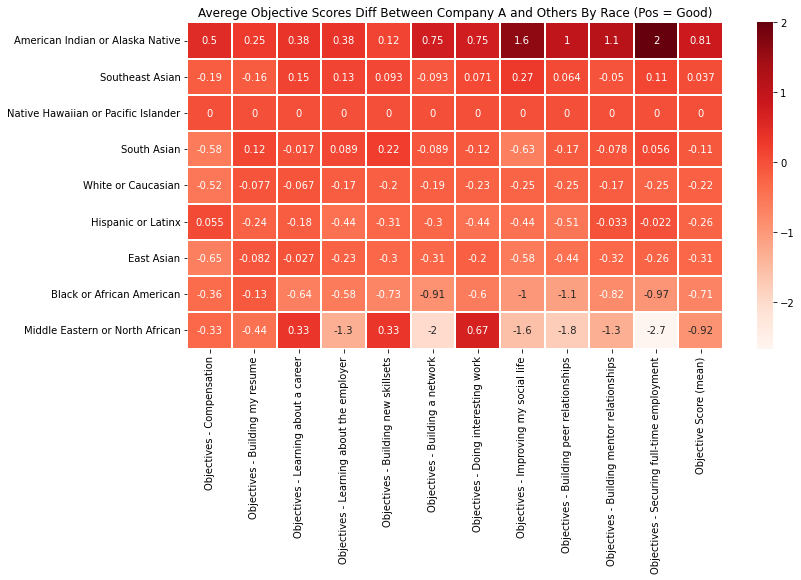

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_race_objectives_diff.sort_values(by='Objective Score (mean)', ascending = False), linewidths=0.05, cmap="Reds", annot=True)
# sns.heatmap(df2.iloc[:,6:17].corr(), linewidths=0.05, center=0.5, vmin=0.0, vmax=1.0)
ax.set_title('Averege Objective Scores Diff Between Company A and Others By Race (Pos = Good)')
fig.show()
# fig.savefig('corr_heatmap_veris.png', bbox_inches = "tight", facecolor='white', dpi=600)

----

### How do ratings of our internship experience differ by gender?

__NPS first:__

In [24]:
gender_nps_A = {}
gender_nps_not_A = {}
gender_nps = {}
for gender in df['Gender'].unique():
    if gender != 'Prefer not to say':
        nps_A = df[(df['Member']=='Company A') & (df['Gender'].str.contains(gender))]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
        gender_nps_A[gender] = nps_A
#         nps_not_A = df[(df['Member']!='Company A') & (df['Gender'].str.contains(gender))]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
#         gender_nps_not_A[gender] = nps_not_A
        nps = df[(df['Gender'].str.contains(gender))]['Net Promoter Score (NPS)'].astype(int).mean(skipna = True)
        gender_nps[gender] = nps
temp1 = pd.DataFrame(gender_nps_A, index=['Company A NPS']).T
temp2 = pd.DataFrame(gender_nps_not_A, index=['Not Company A NPS']).T
temp3 = pd.DataFrame(gender_nps, index=['NPS']).T
df_gender_nps = temp1.join(temp3)
df_gender_nps.rename({'Non-binary or gender non-conforming': 'NB/GNC'})

,Company A NPS,NPS
Women,8.865385,8.986364
Men,8.776471,8.798658
NB/GNC,8.400000,8.285714


We see that in the case of Company A, women interns tend to rate NPS higher than men and nb/gnc interns. For both men and women interns, Company A is lower than all companies combined in terms of average NPS score. Again, this should prompt more examination to figure out how to better internship experiences at Company A.

__Let's look at objectives now for different gender__:

In [25]:
df_gender_objectives_diff  = avg_objectives('Gender', 'Company A', True)
df_gender_objectives_diff

,Objectives - Compensation,Objectives - Building my resume,Objectives - Learning about a career,Objectives - Learning about the employer,Objectives - Building new skillsets,Objectives - Building a network,Objectives - Doing interesting work,Objectives - Improving my social life,Objectives - Building peer relationships,Objectives - Building mentor relationships,Objectives - Securing full-time employment,Objective Score (mean)
Women,-0.576049,-0.115210,-0.116608,-0.049650,-0.272902,-0.205769,-0.233392,-0.508741,-0.365734,-0.283042,-0.371329,-0.281675
Men,-0.461719,0.007264,0.038663,-0.173602,-0.040532,-0.164127,-0.122779,-0.343493,-0.170154,-0.075905,-0.150415,-0.150618
Non-binary or gender non-conforming,-0.614286,0.042857,0.128571,-0.142857,-0.200000,-0.257143,-0.100000,-0.128571,-0.700000,-0.271429,-0.085714,-0.211688


/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/3410930095.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


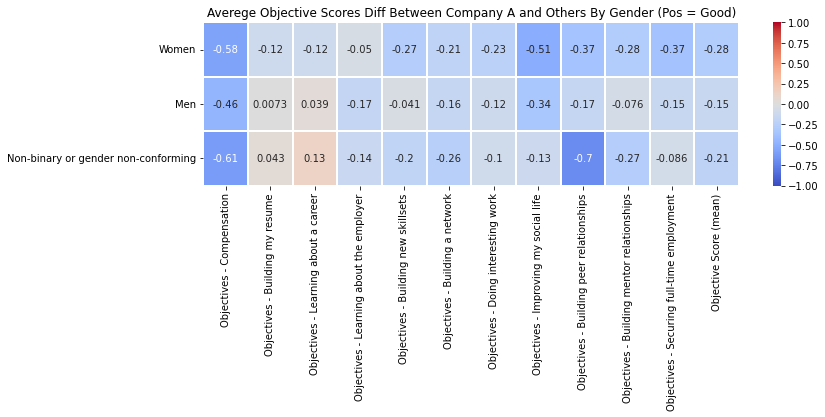

In [26]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.heatmap(df_gender_objectives_diff, linewidths=0.05, center=0, vmin=-1, vmax=1 ,cmap="coolwarm", annot=True)
# sns.heatmap(df2.iloc[:,6:17].corr(), linewidths=0.05, center=0.5, vmin=0.0, vmax=1.0)
ax.set_title('Averege Objective Scores Diff Between Company A and Others By Gender (Pos = Good)')
fig.show()
# fig.savefig('corr_heatmap_veris.png', bbox_inches = "tight", facecolor='white', dpi=600)

We see blue - overall not so good. It is worth noting that Compensation seems to be an objective that is entirely rated lower than all companies combined. 

In [27]:
df_gender_objectives  = avg_objectives('Gender', 'Company A')
df_gender_objectives

,Objectives - Compensation,Objectives - Building my resume,Objectives - Learning about a career,Objectives - Learning about the employer,Objectives - Building new skillsets,Objectives - Building a network,Objectives - Doing interesting work,Objectives - Improving my social life,Objectives - Building peer relationships,Objectives - Building mentor relationships,Objectives - Securing full-time employment,Objective Score (mean)
"Women, Company A",3.480769,4.346154,4.403846,4.423077,4.038462,4.019231,3.846154,2.423077,3.461538,4.019231,3.192308,3.786713
"Men, Company A",3.482353,4.329412,4.376471,4.200000,4.176471,3.847059,3.823529,2.611765,3.588235,4.094118,3.352941,3.807487
"Non-binary or gender non-conforming, Company A",3.600000,4.400000,4.200000,4.000000,3.800000,3.600000,3.400000,2.800000,2.800000,3.800000,3.200000,3.600000


/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/1269723496.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


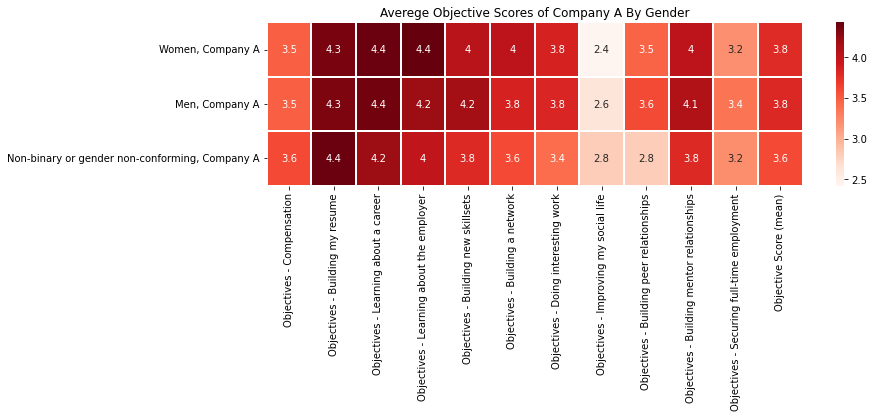

In [28]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.heatmap(df_gender_objectives, linewidths=0.05, cmap="Reds", annot=True)
# sns.heatmap(df2.iloc[:,6:17].corr(), linewidths=0.05, center=0.5, vmin=0.0, vmax=1.0)
ax.set_title('Averege Objective Scores of Company A By Gender')
fig.show()
# fig.savefig('corr_heatmap_veris.png', bbox_inches = "tight", facecolor='white', dpi=600)

It seems largely consistent accross all gender for most objectives. However, one noticably difference lies in the objectives of building peer relationships - NB/GNC interns seems to have rated it lower when compared men and women interns.

----

## Future Work

### More explorations:

**Compute correlation table between NPS and Objectives across all racial and gender subgroups.**

In [29]:
df_corr=pd.DataFrame()

df_corr = df_corr.append(df2.corr().rename({'Net Promoter Score (NPS)':'NPS (Total)'}).iloc[0:1,1:])

df_corr = df_corr.append(df2[df2['Member']=='Company A'].corr().rename({'Net Promoter Score (NPS)':'NPS (Company A)'}).iloc[0:1,1:])
df_corr = df_corr.append(df2[df2['Member']!='Company A'].corr().rename({'Net Promoter Score (NPS)':'NPS (Not Company A)'}).iloc[0:1,1:])

for race in race_set:
    df_corr = df_corr.append(df2[df2['Race/ethnicity'].str.contains(race)].corr().rename({'Net Promoter Score (NPS)':'NPS, ' + race +')'}).iloc[0:1,1:], ignore_index=False)
    df_corr = df_corr.append(df2[(df2['Member']=='Company A')&(df2['Race/ethnicity'].str.contains(race))].corr().rename({'Net Promoter Score (NPS)':'NPS (Company A, ' + race +')'}).iloc[0:1,1:], ignore_index=False)
    df_corr = df_corr.append(df2[(df2['Member']!='Company A')&(df2['Race/ethnicity'].str.contains(race))].corr().rename({'Net Promoter Score (NPS)':'NPS (Not Company A, ' + race +')'}).iloc[0:1,1:], ignore_index=False)

for gender in {'Men', 'Women', 'Non-binary or gender non-conforming'}:
    df_corr = df_corr.append(df2[df2['Gender'].str.contains(gender)].corr().rename({'Net Promoter Score (NPS)':'NPS, '+ gender}).iloc[0:1,1:], ignore_index=False)
    df_corr = df_corr.append(df2[(df2['Member']=='Company A')&(df2['Gender'].str.contains(gender))].corr().rename({'Net Promoter Score (NPS)':'NPS (Company A, '+ gender}).iloc[0:1,1:], ignore_index=False)
    df_corr = df_corr.append(df2[(df2['Member']!='Company A')&(df2['Gender'].str.contains(gender))].corr().rename({'Net Promoter Score (NPS)':'NPS (Not Company A, '+ gender}).iloc[0:1,1:], ignore_index=False)
    
df_corr.head()

,Objectives - Compensation,Objectives - Building my resume,Objectives - Learning about a career,Objectives - Learning about the employer,Objectives - Building new skillsets,Objectives - Building a network,Objectives - Doing interesting work,Objectives - Improving my social life,Objectives - Building peer relationships,Objectives - Building mentor relationships,Objectives - Securing full-time employment,Objective Score (RSS),Objective Score (mean)
NPS (Total),0.379540,0.420475,0.429894,0.394695,0.503281,0.434075,0.571760,0.294918,0.360610,0.437202,0.332690,0.609381,0.606884
NPS (Company A),0.386185,0.355762,0.463480,0.453393,0.499791,0.480372,0.522032,0.368540,0.441931,0.461641,0.358491,0.643620,0.639561
NPS (Not Company A),0.381933,0.431779,0.421511,0.379074,0.502026,0.421786,0.579788,0.277613,0.339732,0.429941,0.324180,0.604468,0.602368
"NPS, White or Caucasian)",0.324101,0.386949,0.388184,0.364330,0.446158,0.417564,0.552952,0.244125,0.334008,0.437029,0.322650,0.585060,0.577429
"NPS (Company A, White or Caucasian)",0.271035,0.357810,0.492859,0.460224,0.503660,0.441944,0.512897,0.299279,0.388609,0.459847,0.349914,0.643098,0.626872


**Compute Heatmap of Corr_Table**

/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_25118/3030186649.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


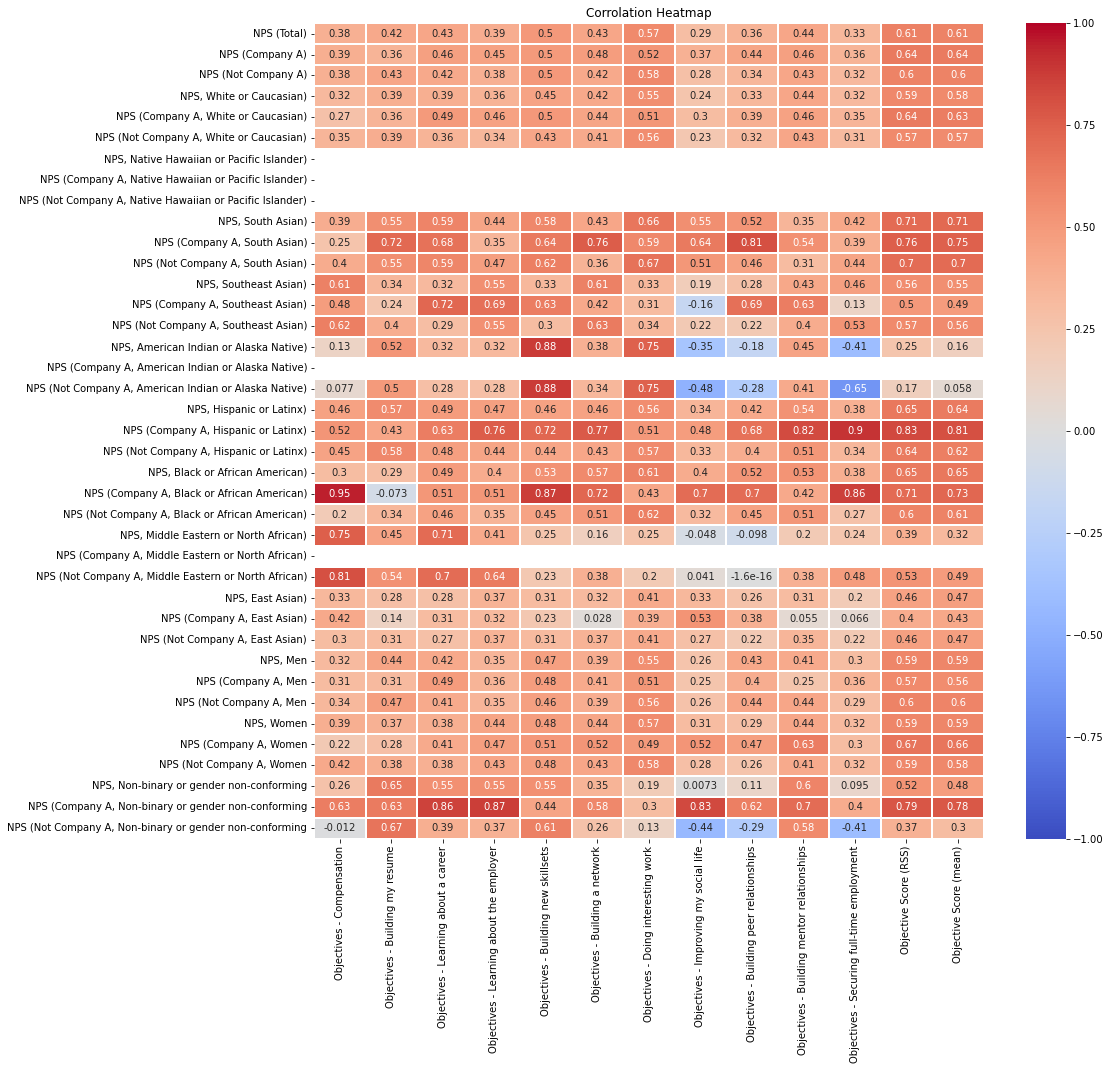

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr, linewidths=0.05, cmap = 'coolwarm', center=0.0, vmin=-1.0, vmax=1.0,annot=True)
ax.set_title('Corrolation Heatmap')
fig.show()

### Findings so far from Correlation Heatmap
- Black/African American interns at company A seems to value objectives of **Compensation**, **Building new skillsets**, Building a network, Improving social skills, Buidling peer relationships, **Securing full-time employment** a lot when deciding on NPS. (pos corr)
- South Asian interns at Company A seems to value less of the compensation but more building network, resume, and peer experiences when deciding on NPS. (pos corr)
- There is too few interns of Middle-eastern/North-african and Native Hawaiian/Pacific Islander and American Indian/Alaska Native descent at company A. Note for diversity efforts.
- Hispanic/Latinx interns at company A seems to value less of Compensation than objectives of building networks, peer and mentor relationships, and securing full-time employments when deciding on NPS. 

